In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
import cv2
import os
from ultralytics import YOLO

if __name__ == "__main__":

    model = YOLO("C:\\Users\\Mark Mwema\\Desktop\\object-detection-project\\yolov8n.pt")
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Something went wrong!")
            print("Exiting program....!")
            break  
        results = model(frame)
        annotated_frame = results[0].plot()
        cv2.imshow("Yolo Object detection!",annotated_frame)
        if cv2.waitKey(1) & 0XFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()    


0: 480x640 1 person, 269.9ms
Speed: 7.4ms preprocess, 269.9ms inference, 4.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 215.8ms
Speed: 37.7ms preprocess, 215.8ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 156.3ms
Speed: 2.8ms preprocess, 156.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 160.8ms
Speed: 3.1ms preprocess, 160.8ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 156.2ms
Speed: 3.6ms preprocess, 156.2ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 167.7ms
Speed: 4.0ms preprocess, 167.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 176.3ms
Speed: 4.5ms preprocess, 176.3ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 person, 174.5ms
Speed: 3.1ms preprocess, 174.5ms inference, 1.4ms postprocess per image a

In [112]:
image_dir = "C:\\Users\\Mark Mwema\\Desktop\\petdata-model\\PetImages"

In [113]:
batch_size = 32

image_size = (128,128)
train_data = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    image_size = image_size,
    batch_size = 32,
    subset  = "training",
    label_mode = 'int',
    seed = 42,
    validation_split = 0.2
)
print(train_data.class_names)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
['Cat', 'Dog']


In [114]:
print(next(iter(train_dataset)))

(<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.17498587, 0.07473958, 0.08650429],
         [0.13995457, 0.07218497, 0.07218497],
         [0.12826286, 0.06572026, 0.06561901],
         ...,
         [0.29320785, 0.324966  , 0.46610585],
         [0.28510216, 0.29607844, 0.44373828],
         [0.2998327 , 0.27450982, 0.407981  ]],

        [[0.16315511, 0.08043452, 0.09000866],
         [0.16782011, 0.09021594, 0.09723188],
         [0.18041274, 0.0823582 , 0.09784534],
         ...,
         [0.3713721 , 0.33063248, 0.4617726 ],
         [0.40676916, 0.34947294, 0.48615652],
         [0.41021395, 0.3189915 , 0.4487709 ]],

        [[0.23547794, 0.10235907, 0.12843138],
         [0.2475337 , 0.10657169, 0.13656557],
         [0.2683663 , 0.10332558, 0.1413457 ],
         ...,
         [0.353586  , 0.29033467, 0.43474337],
         [0.3435456 , 0.27157867, 0.41990894],
         [0.35730365, 0.25857508, 0.40951288]],

        ...,

        [[0.06658074, 0.10579643

In [115]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [116]:
test_data = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    image_size = image_size,
    batch_size = batch_size,
    seed = 42,
    subset = "validation",
    label_mode = 'int',
    validation_split = 0.2
)
test_data.class_names
test_data

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

REMOVING BROKEN IMAGES FROM THE DATASET

In [117]:
train_dataset = train_data.apply(tf.data.experimental.ignore_errors())
test_dataset = test_data.apply(tf.data.experimental.ignore_errors())

Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


I WANT TO LOOP THROUGH THE IMAGES AND DIVIDE BY 255 SCALING 

In [118]:
test_dataset = test_dataset.map(lambda images,labels: ((tf.cast(images,tf.float32)/255.0),labels))
train_dataset = test_dataset.map(lambda x, y : ((tf.cast(x, tf.float32)/255.0),y))

tf.Tensor(
[[[0.46355987 0.39330864 0.41683805]
  [0.48711607 0.4102472  0.4286712 ]
  [0.54600805 0.46777678 0.47974783]
  ...
  [0.4875407  0.3827244  0.4112386 ]
  [0.4341543  0.3265936  0.3575722 ]
  [0.4032715  0.2926863  0.32517713]]

 [[0.47402534 0.4152018  0.42987707]
  [0.5021575  0.44002518 0.44808277]
  [0.55001915 0.47810155 0.48680875]
  ...
  [0.5272667  0.4310317  0.43974802]
  [0.50586945 0.41440907 0.42433316]
  [0.4685638  0.3866551  0.39449823]]

 [[0.50602216 0.43151233 0.4471986 ]
  [0.53238696 0.45551184 0.46458045]
  [0.5659208  0.48815343 0.49599656]
  ...
  [0.55920744 0.45563295 0.45860475]
  [0.53987724 0.43886    0.44589412]
  [0.51529324 0.41333246 0.42509717]]

 ...

 [[0.43922192 0.4218659  0.40046483]
  [0.41864756 0.41452685 0.39479023]
  [0.14519331 0.15156059 0.14043926]
  ...
  [0.68237495 0.62638056 0.62638056]
  [0.636893   0.5789704  0.5787957 ]
  [0.6480986  0.592063   0.59094477]]

 [[0.45010197 0.4310609  0.41581887]
  [0.45208332 0.4421157  0

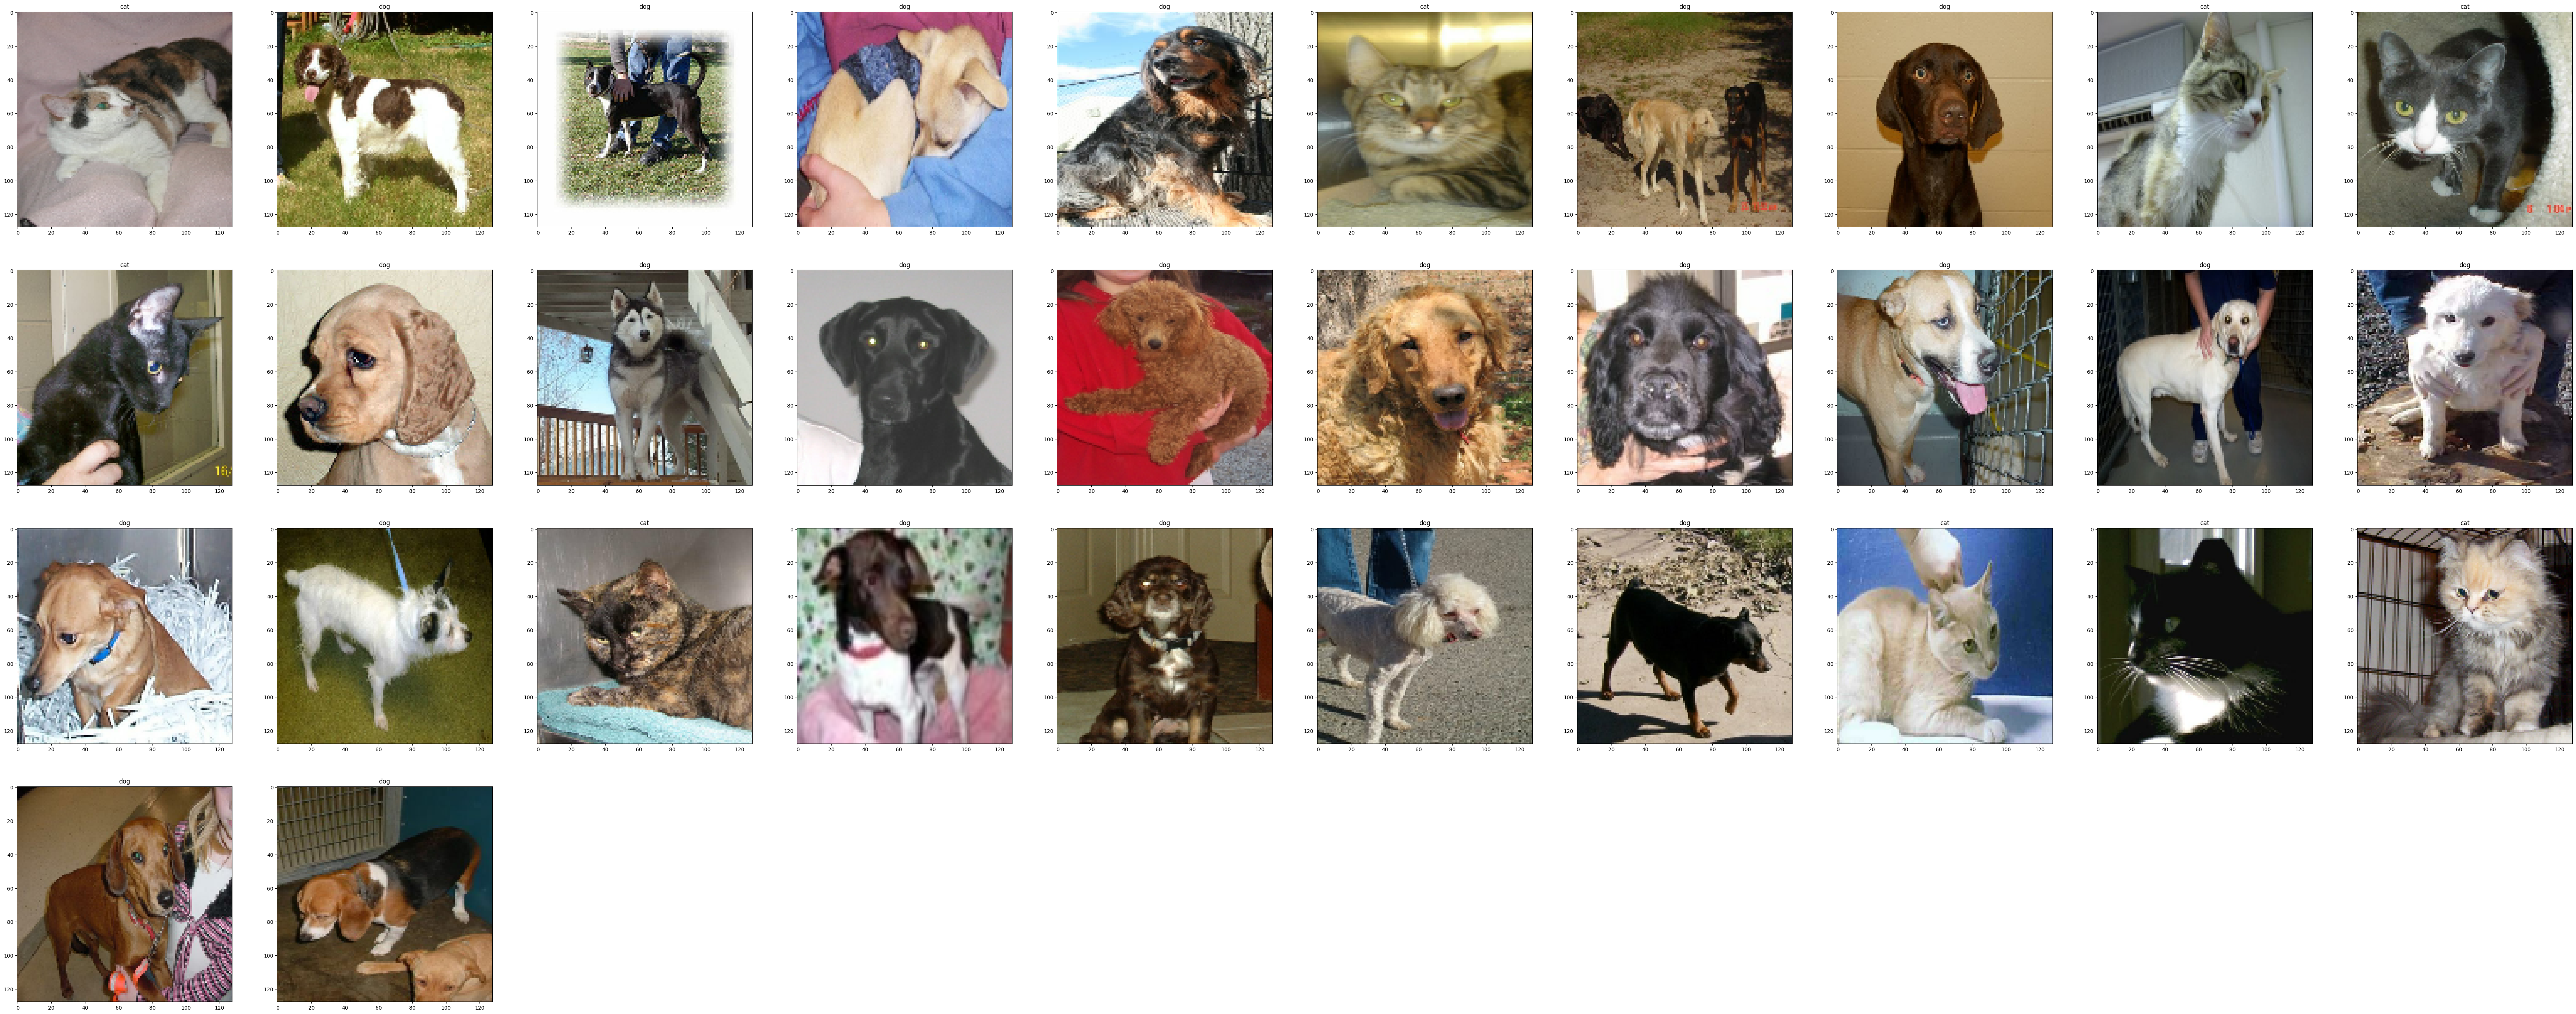

In [119]:
class_names = ['cat','dog']
for images, labels in test_dataset.take(1):
    plt.figure(figsize=(90,90))
    for i in range(batch_size):
        plt.subplot(10,10,i+1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis(True)
        print(images[i])
plt.show()

CREATING THE DATA AUGMENTATION PIPELINE

In [120]:
data_augmentation = tf.keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomRotation(0.1),
    layers.RandomFlip("horizontal")
])

CREATING THE CNN MODEL

In [ ]:
class ResidualUnit(tf.keras.Layer):
    def __init__(self,filters,stride=1,activation='relu',**kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            tf.keras.layers.Conv2D(filters,3,padding='same',strides=stride,use_bias=False),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            tf.keras.layers.Conv2D(filters,3,padding='same',strides=stride,use_bias=False),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layer =[]
        if stride > 1:
            self.skip_layer = [
                tf.keras.layers.Conv2D(filters,1,strides=stride,padding='same',use_bias=False),
                tf.keras.layers.BatchNormalization()
            ]
    def call(self,input):
        main, skip = input, input
        for layer in self.main_layers:
            main = layer(main)
        for skip_layer in self.skip_layer:
            skip = skip_layer(skip)
        return self.activation(main + skip)

In [228]:
from tensorflow.keras import layers
from tensorflow.keras import models
model1 = models.Sequential([
        data_augmentation,
        layers.Conv2D(64,kernel_size = 7,strides = 2,padding="same",kernel_regularizer=tf.keras.regularizers.L2(0.001),input_shape=[224,224,3]),
        layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        layers.MaxPool2D(pool_size=3,strides=2,padding='same'),
    ])

C:\Users\Mark Mwema\Desktop\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [229]:
prev_filter = 64

for filter in [64] *3 + [128] * 4 + [256] * 6 + [512] * 3:
    stride = 1 if filter == prev_filter else 2
    model.add(ResidualUnit(filters=filter,stride=stride))
    prev_filter = filter

ValueError: Could not automatically infer the output shape / dtype of 'residual_unit_23' (of type ResidualUnit). Either the `ResidualUnit.call()` method is incorrect, or you need to implement the `ResidualUnit.compute_output_spec() / compute_output_shape()` method. Error encountered:

Dimensions must be equal, but are 8 and 16 for '{{node add}} = AddV2[T=DT_FLOAT](batch_normalization_78_1/batchnorm/add_1, batch_normalization_79_1/batchnorm/add_1)' with input shapes: [?,8,8,128], [?,16,16,128].

In [ ]:
model.add(tf.keras.layers.GlobalAvgPool2D(1024))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential([
    layers.Input(shape=(128,128,3)),
    data_augmentation,
    layers.Conv2D(50,activation = tf.keras.activations.relu,kernel_size = 2,strides = 2,padding="SAME",kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=64,strides=2,padding='SAME'),
    layers.Conv2D(100,activation = tf.keras.activations.relu,strides=2,kernel_size=2,padding="SAME",kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2,strides=2),
    layers.Conv2D(200,activation = tf.keras.activations.relu,kernel_size = 2,strides = 2,padding="SAME",kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(200,activation = tf.keras.activations.relu,strides=2,kernel_size=2,padding="SAME",kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=2,strides=2),
    layers.Flatten(),
    layers.Dense(50,activation = tf.keras.activations.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.Dropout(0.25),
    layers.Dense(10,activation = tf.keras.activations.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    layers.Dropout(0.23),
    layers.Dense(1,activation = tf.keras.activations.sigmoid,kernel_regularizer=tf.keras.regularizers.L2(0.001))
])

In [201]:
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=['accuracy'])

I WANT TO NOW ADD MORE REGULARIZATION APART FROM DROPOUT

In [202]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5,min_lr=1e-6,patience=5,verbose=1)

In [203]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5,verbose=1,restore_best_weights=True,monitor='val_loss')

In [204]:
for images , labels in train_dataset.take(2):
    print(f"image Size : {images.shape} data type: {images.dtype}")
    print(f"labels Size : {labels.shape} data type: {labels.dtype}")

image Size : (32, 128, 128, 3) data type: <dtype: 'float32'>
labels Size : (32,) data type: <dtype: 'int32'>
image Size : (32, 128, 128, 3) data type: <dtype: 'float32'>
labels Size : (32,) data type: <dtype: 'int32'>


In [205]:
print(next(iter(train_dataset)))

(<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         ...,
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

        [[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         ...,
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

        [[3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03],
         ...,
         

In [206]:
train_dataset.cache().prefetch(tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [207]:
model_history  = model.fit(train_dataset,
                            epochs=32,  
                            verbose=2,  
                            callbacks=[early_stopping_callback,lr_scheduler],
                            validation_data = train_dataset
                        )

Epoch 1/32
155/155 - 60s - 388ms/step - accuracy: 0.5585 - loss: 1.1982 - val_accuracy: 0.5075 - val_loss: 1.1650 - learning_rate: 1.0000e-03
Epoch 2/32
155/155 - 49s - 319ms/step - accuracy: 0.5863 - loss: 1.1055 - val_accuracy: 0.5075 - val_loss: 1.1116 - learning_rate: 1.0000e-03
Epoch 3/32
155/155 - 53s - 343ms/step - accuracy: 0.6056 - loss: 1.0369 - val_accuracy: 0.5069 - val_loss: 1.4126 - learning_rate: 1.0000e-03
Epoch 4/32
155/155 - 81s - 519ms/step - accuracy: 0.6161 - loss: 0.9668 - val_accuracy: 0.4941 - val_loss: 0.9908 - learning_rate: 1.0000e-03
Epoch 5/32
155/155 - 53s - 343ms/step - accuracy: 0.6260 - loss: 0.9068 - val_accuracy: 0.4949 - val_loss: 0.9418 - learning_rate: 1.0000e-03
Epoch 6/32
155/155 - 55s - 354ms/step - accuracy: 0.6349 - loss: 0.8651 - val_accuracy: 0.5322 - val_loss: 0.8969 - learning_rate: 1.0000e-03
Epoch 7/32
155/155 - 54s - 347ms/step - accuracy: 0.6388 - loss: 0.8251 - val_accuracy: 0.5077 - val_loss: 5.1776 - learning_rate: 1.0000e-03
Epoch 

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_14 (Sequential)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 64, 64, 100)         │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64, 64, 100)         │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 32, 32, 100)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 16, 16, 200)         │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 200)         │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 8, 8, 200)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 4, 4, 400)           │         320,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 400)           │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 2, 2, 400)           │         640,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 2, 2, 400)           │           1,600 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 1, 1, 400)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 100)                 │          40,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,271,305 (12.48 MB)

 Trainable params: 1,089,701 (4.16 MB)

 Non-trainable params: 2,200 (8.59 KB)

 Optimizer params: 2,179,404 (8.31 MB)

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
list = [,]

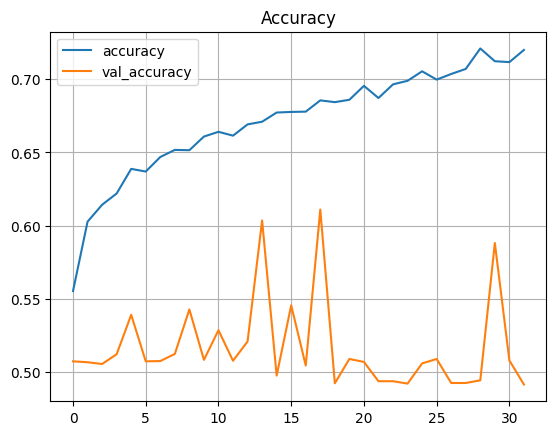

In [ ]:
plt.plot(model_history.history.get('accuracy'))
plt.plot(model_history.history.get('val_accuracy'))
plt.title("Accuracy")
plt.grid(True)
plt.legend(labels=['accuracy','val_accuracy'],loc='best')
# plt.ylim(0,0.9)
plt.show()

[]

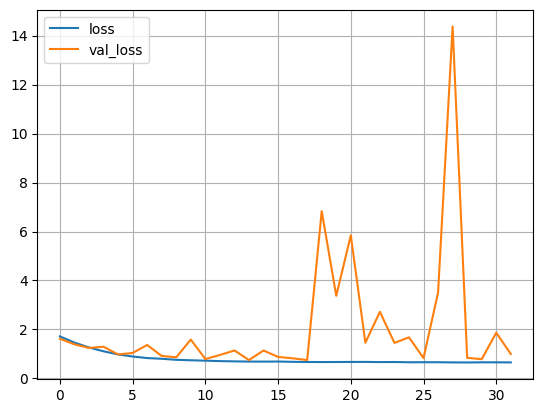

In [ ]:
plt.plot(model_history.history.get('loss'),label='loss')
plt.plot(model_history.history.get('val_loss'),label='val_loss')
plt.grid(True)
plt.legend()
plt.plot()

In [ ]:
import sklearn as sk
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
index = 0
for data in predictions:
    if data>0.5:
        predictions[index ] = 1
    else:
        predictions[index ] = 0
    index +=1

In [ ]:
actual_data = train_dataset.map(lambda x,y : y)

In [ ]:
model.evaluate(train_dataset)

     79/Unknown 6s 81ms/step - accuracy: 0.6099 - loss: 0.7570

155/155 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.6079 - loss: 0.7573


[0.7515443563461304, 0.6108185052871704]